# Car Price Prediction

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('car data.csv')

In [ ]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
df.shape

(301, 9)

In [ ]:
print(df['Seller_Type'].unique())
print(df['Transmission'].unique())
print(df['Owner'].unique())

['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]


In [ ]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [ ]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [ ]:
final_dataset = df[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

In [ ]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
import datetime

today = datetime.date.today()

year = today.year

final_dataset['Current_Year'] = year

In [ ]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2023
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2023
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2023
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2023
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2023


In [ ]:
final_dataset['Age'] = final_dataset['Current_Year']-final_dataset['Year']

In [ ]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,Age
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2023,9
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2023,10
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2023,6
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2023,12
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2023,9


In [ ]:
final_dataset.drop(['Year'],axis=1,inplace=True)


In [ ]:
final_dataset.drop(['Current_Year'],axis=1,inplace=True)


In [ ]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,10
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,6
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,12
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,9


In [ ]:
print(df['Fuel_Type'].unique())

['Petrol' 'Diesel' 'CNG']


In [ ]:
final_dataset=pd.get_dummies(final_dataset,drop_first=True)

In [ ]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,9,0,1,0,1
1,4.75,9.54,43000,0,10,1,0,0,1
2,7.25,9.85,6900,0,6,0,1,0,1
3,2.85,4.15,5200,0,12,0,1,0,1
4,4.60,6.87,42450,0,9,1,0,0,1


In [ ]:
final_dataset.corr(method ='pearson')

,Selling_Price,Present_Price,Kms_Driven,Owner,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
Age,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


In [ ]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,9,0,1,0,1
1,4.75,9.54,43000,0,10,1,0,0,1
2,7.25,9.85,6900,0,6,0,1,0,1
3,2.85,4.15,5200,0,12,0,1,0,1
4,4.60,6.87,42450,0,9,1,0,0,1
...,...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,0,7,1,0,0,1
297,4.00,5.90,60000,0,8,0,1,0,1
298,3.35,11.00,87934,0,14,0,1,0,1
299,11.50,12.50,9000,0,6,1,0,0,1


In [ ]:
final_dataset.iloc[:,0]

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [ ]:
X= final_dataset.iloc[:,1:]
Y = final_dataset.iloc[:,0]

In [ ]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,9,0,1,0,1
1,4.75,9.54,43000,0,10,1,0,0,1
2,7.25,9.85,6900,0,6,0,1,0,1
3,2.85,4.15,5200,0,12,0,1,0,1
4,4.60,6.87,42450,0,9,1,0,0,1


In [ ]:
X.head()

,Present_Price,Kms_Driven,Owner,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,9,0,1,0,1
1,9.54,43000,0,10,1,0,0,1
2,9.85,6900,0,6,0,1,0,1
3,4.15,5200,0,12,0,1,0,1
4,6.87,42450,0,9,1,0,0,1


In [ ]:
Y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,Y)

ExtraTreesRegressor()

In [ ]:
print(model.feature_importances_)

[3.75281454e-01 3.74905580e-02 3.44330741e-04 7.79283016e-02
 2.32478368e-01 1.36816840e-02 1.25672038e-01 1.37123266e-01]


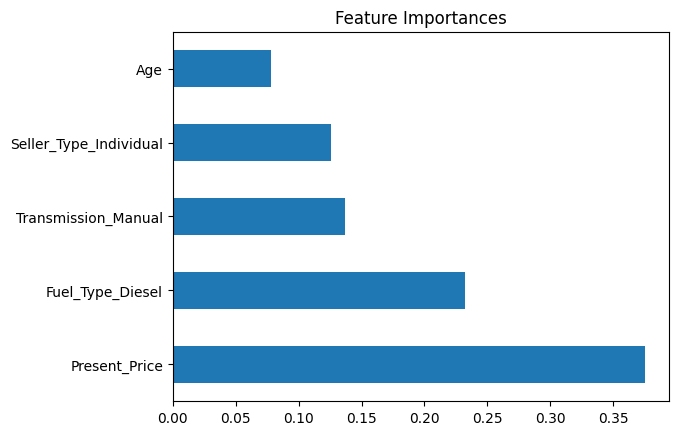

In [ ]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.title('Feature Importances')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split #class to divide the data into train and validation set

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
#we divide the data into 2 parts :- 80% train and 20% test data
# and random_state is used to guarantee that same sequence of
#random numbers are generated each time you run the code.
#And unless there is some other randomness present in the process,
#the results produced will be same as always.

In [ ]:
X_train.shape

(240, 8)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor()

In [ ]:
#A random forest regressor is an estimator that fits a number of classifying decision trees
#on various sub-samples of the dataset and uses averaging to improve the prediction accuracy
#and slos control over-fitting.

In [ ]:
import numpy as np
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
#n_estimators is a parameter of the random forest regressor which is used to control no of trees in the forest
#so we use 100 200 ....1200 trees for the model
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [ ]:
 #Randomized Search CV
# Number of features to consider at every split
max_features = ['auto', 'sqrt'] # we first consider all the featurees and
#then sqare root number of features to train the model

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
#we create trees with 5 10 15 for each model...and train it

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# we split as 2 nodes forst then 5 then 10 like that till 100 from the list

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]


In [ ]:
max_depth

[5, 10, 15, 20, 25, 30]

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
#Randomized search on hyper parameters.
#used to select the best parameter for the model

In [ ]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [ ]:
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation,
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [ ]:
#rf = object of the regressor
#param_distributions = Dictionary with parameters names as keys and parameters as vlaues
#scoring = metric that we used to evaluate the performance of the cross-validated model on the test set.
#we used negative mean squared error.
#cv = 5 fold cross validation
#n_jobs = no of cores to use

In [ ]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [ ]:
predictions=rf_random.predict(X_test)

In [ ]:
predictions1=rf_random.predict(X_train)

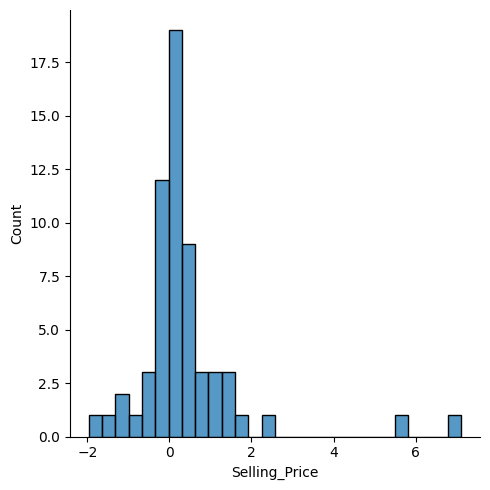

In [ ]:
sns.displot(y_test-predictions)

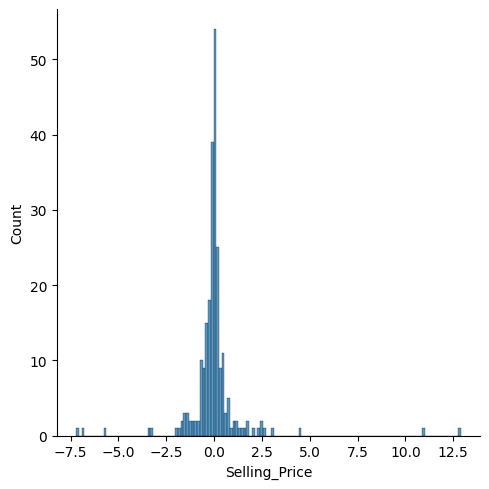

In [ ]:
sns.displot(y_train-predictions1)

In [ ]:
#form the plot we can see that almost all the values predicted are correct by comparing the diff between the y_test
#predicted value and we see from the normal distribution of the graph that not much of the samples have varied
#much from the actual value

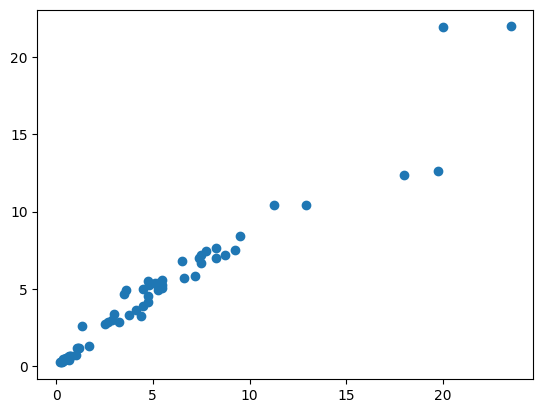

In [ ]:
plt.scatter(y_test,predictions)

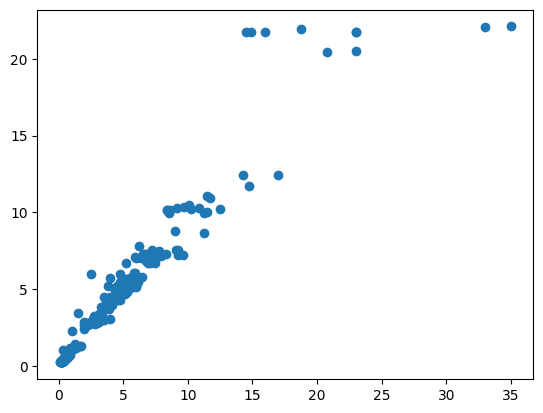

In [ ]:
plt.scatter(y_train,predictions1)

In [ ]:
#even from this points plot we can see that almost all the points are along the
#line y=x which says that the predicted and the y_test values are smae

In [ ]:
import pickle
# open a file, where you ant to store the data
file = open('random_forest_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)
#we use a pickle file to store the data in a byte stream format

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,predictions)
rmse = np.sqrt(mse)
print("RMSE : {:.2f}".format(rmse))

RMSE : 1.38


In [ ]:
from sklearn.metrics import r2_score
r = r2_score(y_test, predictions)
print("R2 score : {}" . format(r))

R2 score : 0.9242871722595993


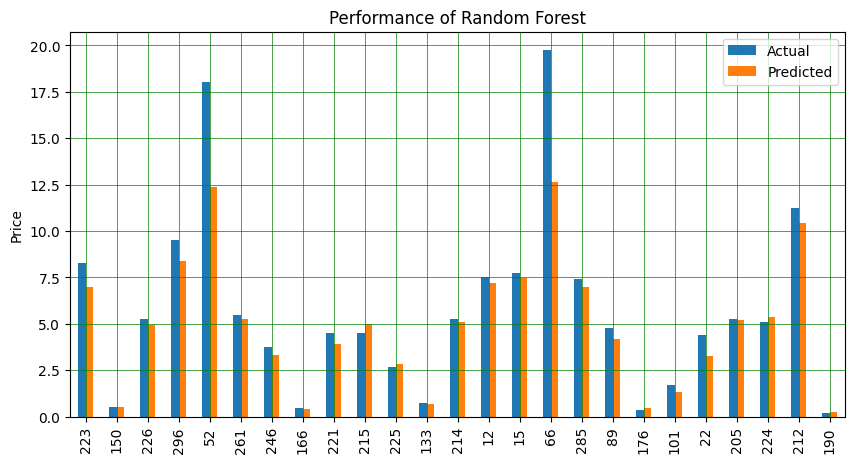

In [ ]:
df_check = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
df_check = df_check.head(25)
#round(df_check,2)
df_check.plot(kind='bar',figsize=(10,5))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.title('Performance of Random Forest')
plt.ylabel('Price')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
mse_predict = round(mean_squared_error(y_test,predictions),4)
mae_predict = round(mean_absolute_error(y_test,predictions),4)
print ('MSE is:'+str(mse_predict))
print ('MAE is:'+str(mae_predict))

MSE is:1.9138
MAE is:0.7123


In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
cutoff = 1.8                              # decide on a cutoff limit
y_pred_classes = np.zeros_like(predictions)
y_test_classes = np.zeros_like(predictions)     # initialise a matrix full with zeros
y_pred_classes[abs(y_test - predictions) > cutoff] = 1

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_classes, y_pred_classes)

Text(0.5, 1.0, 'Confusion Matrix')

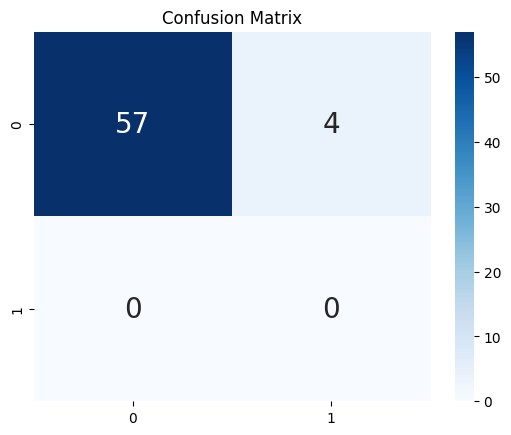

In [ ]:
df_cm = cm
sns.heatmap(df_cm,annot=True,cmap="Blues" ,annot_kws={"size": 20})
plt.title('Confusion Matrix')

In [ ]:
from sklearn.metrics import classification_report
matrix = classification_report(y_test_classes, y_pred_classes)
print(matrix)

              precision    recall  f1-score   support

         0.0       1.00      0.93      0.97        61
         1.0       0.00      0.00      0.00         0

    accuracy                           0.93        61
   macro avg       0.50      0.47      0.48        61
weighted avg       1.00      0.93      0.97        61



In [ ]:
from sklearn.metrics import accuracy_score
s = accuracy_score(y_test_classes,y_pred_classes)
print("accuracy of the model : {}" . format(s))

accuracy of the model : 0.9344262295081968
